# The Estimated Model
So, at this point, we can think of our parameter estimates either as those that minimise the sum-of-squared errors or, more generally, as those values that maximise the likelihood (i.e. make the data most probable). As argued previously, the likelihood perspective is more universally applicable and so it is useful to think of the estimates in proabilistic terms. As such, if our data are truly drawn from a normal distribution then these parameter values make the data more likely than any other possible combination of values.

## The Final Estimates
Using the `mtcars` example again, after using either OLS or MLE (with REML for the variance) we have:

- $\hat{\beta}_{0} = 37.2851$
- $\hat{\beta}_{1} = -5.3445$
- $\hat{\sigma}^{2} = 9.2774$

This means that our final regression model can be expressed as

$$
\text{MPG}_{i} = 37.2851 + -5.3445 \times \text{Weight}_{i} + e_{i}.
$$

The residuals can be calculated once values for $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ are available through a simple subtraction. If we take the *fitted* or *predicted* values of MPG to be

$$
\begin{align*}
    \widehat{\text{MPG}}_{i} &= \hat{\beta}_{0} + \hat{\beta}_{1} \times \text{Weight}_{i} \\  
                             &= 37.2851 + -5.3445 \times \text{Weight}_{i}
\end{align*}
$$

then the residuals are simply

$$
e_{i} = \text{MPG}_{i} - \widehat{\text{MPG}}_{i},
$$

which is just the distance between the measured value of MPG and the point on the regression line for the corresponding value of Weight.

We can also express this in terms of our probabilistic model like so

$$
\text{MPG}_{i} \sim \mathcal{N}\left(37.2851 + -5.3445 \times \text{Weight}_{i}, 9.2774\right),
$$

though this starts to get a little difficult to parse. Neverthless, the point is that these estimates now complete every unknown element of the model.

## The `R` Output for Simple Regression
As indicated in other parts of this lesson, the `R` function we use to fit a simple regression model is `lm()`, for `l`inear `m`odel. We specify a model *symbolically* using the `R` formula interface, which ee can think of as specifying the *mean function* we want `lm()` to use. Because linear models have a constant variance function, there is no option to specify this. In the example below, the model formula is given by `mpg ~ wt`, where the `~` symbol (called a *tilde*) is used to denote that `mpg` should be modelled as a function of `wt`. This is used instead of `=` because the equals symbol is already used to define named arguments within a function (e.g.`data=mtcars`). The `~` also provides a nice connection with the mathematical notation for the distribution of a random variable.

In order to fit the model, we call `lm()` and then save the estimated model to an object we call `mod`. Inside `mod` are all the results from fitting the model. If we call `summary()` on the fitted object, we get a results table, as shown below.

In [1]:
mod <- lm(mpg ~ wt, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


We will discuss much more about the specifics of this table over the rest of this unit. For now, we can see that the parameter estimates are given in the `Estimates` column of the table, with the estimate of $\sigma$ given below the table as the `Residual standard error`.

We can also extract various bits of information from the model object. For instance, to get just the estimates of the regression line we can use

In [2]:
print(coef(mod))

(Intercept)          wt 
  37.285126   -5.344472 


To get the *fitted values* we can use

In [3]:
print(fitted(mod))

          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.282611           21.919770           24.885952           20.102650 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.900144           18.793255           18.205363           20.236262 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          20.450041           18.900144           18.900144           15.533127 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.350247           17.083024            9.226650            8.296712 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           8.718926           25.527289           28.653805           27.478021 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.111004           18.472586           18.926866           16.762355 
   Pontiac Firebird         

and to get the *residuals*, we can use

In [4]:
print(resid(mod))

          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
         -2.2826106          -0.9197704          -2.0859521           1.2973499 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
         -0.2001440          -0.6932545          -3.9053627           4.1637381 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          2.3499593           0.2998560          -1.1001440           0.8668731 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
         -0.0502472          -1.8830236           1.1733496           2.1032876 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          5.9810744           6.8727113           1.7461954           6.4219792 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
         -2.6110037          -2.9725862          -3.7268663          -3.4623553 
   Pontiac Firebird         

Extracting the variance is a little more fiddly, but can be done using

In [5]:
sigma <- summary(mod)$sigma
print(sigma^2)

[1] 9.277398


or we can calculate it manually, given what we know, using

In [6]:
sigma2 <- sum(mod$residuals^2) / mod$df.residual
print(sigma2)

[1] 9.277398


## Interpreting the Estimates
So, we now have some numbers that correspond to our fitted model. Although we have focussed mainly on *how* to get these numbers, in practical terms our main interest is what exactly do these numbers mean? 

### The Slope
We start with the slope of the regression line because this is typically of *most* interest. In short, there are two elements of note for the slope: its *magnitude* and its *direction*. The magnitude is given by the actual numeric value of the slope. This is interpreted as the amount that $y$ changes for a *unit increase* in $x$. In context, this tells us how much MPG changes if we increase Weight by 1. Interpreting this therefore depends upon what a change of Weight by 1 actually means. For the `mtcars` dataset, `wt` is measured in units of 1,000 lbs. So a unit change for this variable corresponds to an *increase* in weight of 1,000 lbs. As such, our estimated slope indicates that an increase in weight of 1,000 lbs results in a change in average MPG of 5.3445. In addition, if we look at the *sign* of the estimate, we can infer the *direction* of this relationship. Because the estimate is *negative*, this corresponds to a *reduction* in MPG. So, for each additional 1,000 lbs of weight, MPG decreases by 5.3445.

Hopefully it is clear from this description that the parameter estimates are on the scale of the *outcome variable*, but also depend upon how that particular predictor is scaled. If we changed the scaling of `wt` to actual measurements of lbs (by multiplying it by 1,000), the model fit would be the same, but the scale of the estimates would shift. As such, the interpretation is dependent upon the scaling we choose. We will see next week how this can be made simpler by *standardising* the regression model. Determining whether this is a meaningful change in the outcome is something we will consider in more detail next week, but it should be possible based on the aims of the study and your own domain knowledge to make some sort of inference based on these estimates alone. 

### The Intercept
The intercept is often of less interest in a simple regression model. In part, this is because its interpretation is usually uninteresting within the context of the data analysis. In addition, the value is often not very meaningful. For instance, in the context of the `mtcars` dataset, an intercept of 37.2851 can be interpreted as the predicted value of MPG for a  car that Weighs 0 lbs. This can be seen to fall out of the regression equation, as

$$
\begin{align*}
    E(y|x=0) &= \beta_{0} + \beta_{1}x \\ 
             &= \beta_{0} + (\beta_{1} \times 0) \\ 
             &= \beta_{0}
\end{align*}
$$

However, it should be clear that this estimate does not make much sense. A car that weights nothing should really have an MPG of 0, rather than an MPG of 37.2851. To make the intercept make more sense, one option would be to rescale the regression model so that the intercept represents the value of MPG for the *average* Weight in the sample. This is what *mean-centering* does, which we will discuss more next week. Another option would be to drop the intercept entirely and perform *regression through the origin*, where we force the value of MPG for a weight of 0 to be 0. This is more realistic, however, this can result in a *worse* model fit. We can see this below in `R`, where removing the intercept (by including `- 1` in the model formula) results in much larger variance than keeping it in the model[^interceptfoot].

In [7]:
mod.2 <- lm(mpg ~ wt - 1, data=mtcars)
print(summary(mod.2)$sigma^2)

[1] 126.9876


This makes sense because forcing the intercept to have a value of 0 on the $y$ axis forces the regression slope to be *positive*, which we know is not appropriate. We could fix this by modelling the *inverse* of Weight instead 

In [8]:
inv.wt <- 1/mtcars$wt
mod.3  <- lm(mpg ~ inv.wt - 1, data=mtcars)
print(summary(mod.3)$sigma^2)

[1] 9.470305


which is clearly better than the model with no intercept and the raw values of `wt`. However, this is going to be harder to interpret *and* is still a worse fit than just leaving the intercept in. As such, the intercept is often necessary to provide a good overall model fit, even if the value is somewhat meaningless. Indeed, a car with a weight of 0 is pretty meaningless anyway, as is any car with a weight below or above certain thresholds. As such, this model will have practical limits in terms of sensible predictions. Although the regression line theoretically extends across values of Weight from $-\infty$ to $+\infty$, the reality is that there will be some sharp cut-offs based on both the *lightest* and *heaviest* cars that are feasible. Any predictions outside that range are essentially meaningless. As such, the intercept in its current form is an element of the model prediction that we would likely ignore for practical purposes.

### The Variance
On its own, the estimated value of the variance is not that easy to interpret. We can, of course, take the square-root and arrive at the estimated standard deviation instead. In the `R` output, the estimated standard deviation is labelled in the summary table as the `Residual standard error`. We can extract it with

In [9]:
print(summary(mod)$sigma)

[1] 3.045882


or calculate it manually from the information in the `mod` object 

In [10]:
sigma <- sqrt(sum(mod$residuals^2)/mod$df.residual)
print(sigma)

[1] 3.045882


Either way, this means that, on average, the data deviates from the regression line by around 3.046 MPG. This is quite small on the scale of MPG, and so would seem quite good. However, on its own, we do not really have a way to interpret this value. As such, we tend to treat the variance or standard deviation as a *relative* measure during the course of model building. Our aim, very generally, is to find the model that makes this value as *small* as possible. Returing back to our conceptualisation from earlier of

$$
\sigma^{2}_{\text{Total}} = \sigma^{2}_{\text{Line}} + \sigma^{2}_{\text{Error}},
$$

our aim is to find the model that partitions the largest chunk of the total variance into the variance explained by the regression line, thus making the variance attributable to error as small as possible. This will have a direct influence on *inference*, as we will see next week, but also makes intuitive sense. From this perspective, we will use variance as a relative measure to see whether one model is able to reduce the error variance more than another. We already saw that above when assessing whether regression through the origin or regression through the origin with inverse weight were better models. We will see examples that formalise this more when we get to the concept of ANOVAs a little later on this unit.

## Visualising the Estimates
As a final part of this section, one of the most important things we can do to aid interpretation is to *visualise* the model. For simple regression, this typically means drawing the estimated regression line over a scatter plot of the data. This provides an immediate visual sense of all the numeric elements discussed above. Although we will see more fleixble approaches to plotting using the `effects` package later, for the moment we will just demonstrate some simple methods of visualisation in base `R` and `ggplot2`.

The code below shows how to make a basic scatterplot with a regression line superimposed. We first create the scatterplot using the basic `plot()` function. We can then add the regression line using the `abline()` function, which has a useful `reg` option where we pass it the model object and the line is drawn automatically.

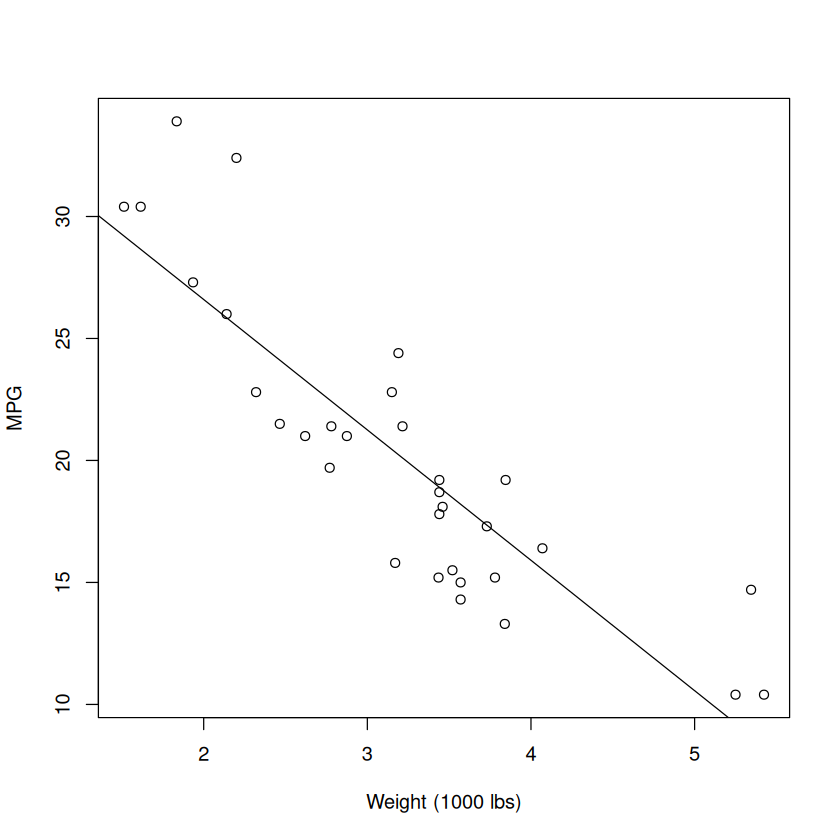

In [11]:
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight (1000 lbs)", ylab="MPG")
abline(reg=mod)

This plot is not going to win any awards for visual style, but it is simple and effective as a quick means of drawing the model fit. It is the sort of plot we would use during the process of analysis, just to have a quick look, as there is no point spending a long time styling a plot for this purpose. Getting distracted building a plot is a trap you need to try and avoid during the course of an analysis. Unless the results are final and you are creating something for a publication, this is almost always a waste of time. The key point is that we are able to *see* the model fit and assess it visually. This is one of the most important steps of building a statistical model as there is no substitute for looking at the data and understanding what your model is trying to say. If you manage to "complete" an analysis without creating any plots along the way, then you have not performed the analysis correctly. 


In the event that we do want something better for a publication, we can use the more flexible plotting options within `ggplot2`

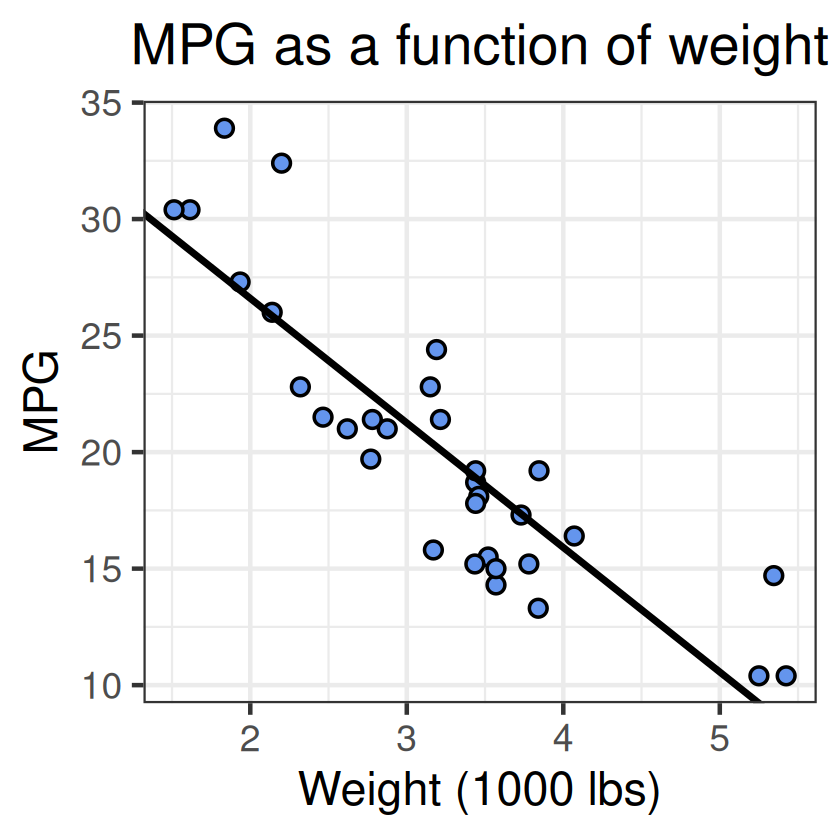

In [12]:
library(ggplot2)

beta <- coef(mod)

ggplot(mtcars, aes(wt, mpg)) + 
    geom_point(size=4, fill="cornflowerblue", colour="black", pch=21, stroke=1.5) +
    geom_abline(intercept=beta[1], slope=beta[2], linewidth=2) +
    labs(title="MPG as a function of weight", x="Weight (1000 lbs)", y="MPG") + 
    theme_bw(base_size=28) + 
    theme(plot.title=element_text(hjust = 0.5))

Either way, the key point is that we are able to *see* the model fit and assess it visually. This is one of the most important steps of building a statistical model as there is generally no substitute for looking at the data and understanding what your model is trying to say. If you manage to "complete" an analysis without creating any plots along the way, then you have not performed the analysis correctly. 

`````{topic} What do you now know?
In this section, we have explored the results of estimating a simple regression model, either using OLS or using MLE (with REML for the variance). After reading this section, you should have a good sense of:

- How the final estimates can be used to complete the unknowns in the regression equation, producing both predicted (also known as *fitted*) values and residuals.
- How the `R` formula interface can be used to specify the mean function of the model using `lm()`. 
- How to interpret some of the `R` output table from the `lm()` function, as well as how to extract some basic results from the fitted model object.
- The meaning of the *slope* estimate in terms of quantifying the average change in $y$ for a unit-change in $x$.
- The meaning of the *intercept* estimate in terms of quantifying the value of $y$ when $x = 0$.
- The meaning of the *variance* estimate and how this would typically be used more as a tool for *model comparison*, rather than directly interpreted.
- How the model fit can be visualised using some basic plots in `R`.
`````

[^interceptfoot]: The `1` can also be used to fit an intercept-only model to the data. For instance, `mpg ~ 1` would fit a model containing only the parameter $\beta_{0}$. In the absence of any predictors, this would simply be the *mean* of MPG.